In [4]:
# %matplotlib notebook
# %matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)
# import matplotlib
# matplotlib.rcParams['figure.figsize'] = (14, 7)
# import mpld3
# mpld3.enable_notebook()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def make_sin_df(start, end, freq, T_ms):
    times = pd.date_range(start, end, freq=freq)
    times_ms = times.values.astype(float) / 1e6
    w = 2 * np.pi / T_ms
    sin = np.sin((times_ms - times_ms[0]) * w) + 1
    return make_ohlc_df(sin, times)

def make_ohlc_df(array, index):
    arr_4 = array.reshape(-1, 1).repeat(4, axis=1)
    df = pd.DataFrame(arr_4, index=index, columns=['open', 'close', 'high', 'low'])
    df.index.rename('date', inplace=True)
    df['volume'] = np.ones_like(array) * 1000000
    return df


sin_df = make_sin_df('2010-1-1', '2015-1-1', freq='D', T_ms=30 * 24 * 60 * 60 * 1000)
sin_df.head()

,open,close,high,low,volume
date,,,,,
2010-01-01,1.000000,1.000000,1.000000,1.000000,1000000.0
2010-01-02,1.207912,1.207912,1.207912,1.207912,1000000.0
2010-01-03,1.406737,1.406737,1.406737,1.406737,1000000.0
2010-01-04,1.587785,1.587785,1.587785,1.587785,1000000.0
2010-01-05,1.743145,1.743145,1.743145,1.743145,1000000.0


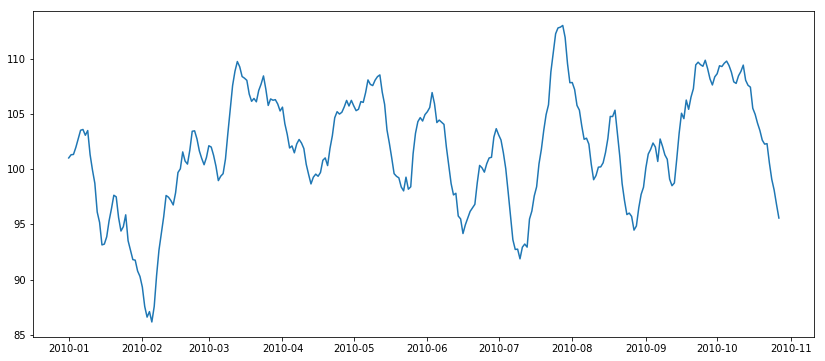

In [5]:
from statsmodels.tsa.arima_process import arma_generate_sample
np.random
def make_random_df(start, end, freq):
    times = pd.date_range(start, end, freq=freq)
    arparams, maparams = [1., -1.65851954, 0.69209138], [1, -0.13870413]
    y = arma_generate_sample(arparams, maparams, len(times)) + 100
    return make_ohlc_df(y, times)

rand_df = make_random_df('2010-1-1', '2015-1-1', freq='D')
plt.plot(rand_df['close'][:300])

In [15]:
import pandas as pd
from collections import OrderedDict
dict = OrderedDict()

dict['TSLA'] = pd.read_csv('/home/tot/_tot/projects/data/tesla.csv', index_col='Date', parse_dates=['Date'])
dict['TSLA'].rename(columns=str.lower, inplace=True)

dict['sin'] = make_sin_df('2010-1-1', '2017-1-1', freq='D', T_ms=(365 + 2/7)/2 * 24 * 60 * 60 * 1000)
dict['hor'] = make_ohlc_df(np.ones(len(dict['sin'])), dict['sin'].index)
dict['rand'] = make_random_df('2010-1-1', '2017-1-1', freq='D')

panel = pd.Panel(dict)
panel.to_pickle('pd_panel_data.pickle')
print(panel)

<class 'pandas.core.panel.Panel'>
Dimensions: 4 (items) x 2558 (major_axis) x 6 (minor_axis)
Items axis: TSLA to rand
Major_axis axis: 2010-01-01 00:00:00 to 2017-01-01 00:00:00
Minor_axis axis: adj close to volume


2017-01-01 00:00:00 1.0


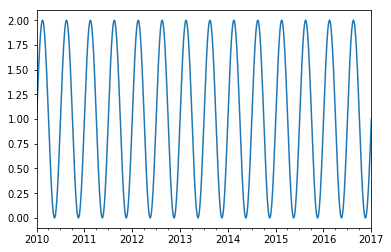

In [4]:
panel['sin']['close'].plot()
print(panel['sin'].index[-1], panel['sin']['close'][-1])